## A Brief history of Neural Nets

- 1958, Frank Rosenblatt "The perceptron: A probabilistic model for information storage and organization in the brain."
- 많은 기대와 매스컴의 주목

<img src=attachment:image.png width=600><center>*source: http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning/</center>
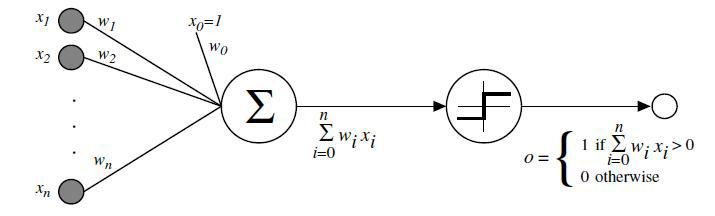

- 1969, Marvin Minsky and Seymour Papert,"Perceptrons: an introduction to computational geometry"
- Marvin Minsky, founder of the MIT AI Lab, published their skepticism in the form of rigorous analysis on of the limitations of Perceptrons in 1969. He concluded this Perceptron approach to AI was a dead end. The most widely discussed element of this analysis is the elucidation of the limits of a Perceptron - they could not, for instance, learn the simple boolean function XOR because it is not linearly separable.
- So, it is important to note Minsky’s analysis of Perceptrons did not merely show the impossibility of computing XOR with *a single Perceptron, but specifically argued that it had to be done with multiple layers of Perceptrons - what we now call multilayer neural nets - and that Rosenblatt’s learning algorithm did not work for multiple layers*. And that was the real problem: the simple learning rule previously outlined for the Perceptron does not work for multiple layers.
- 이후 Neural Net은 인기가 급속도로 줄어 들며 15년 넘게 암흑기

- Backpropagation was derived by multiple researchers but Paul Werbos was first in the US to propose that it could be used for neural nets after analyzing it in depth in his 1974 PhD Thesis. 하지만 학계에서 이미 관심 없었음.
- Paul Werbos said "Minsky’s book was best known for arguing that (1) we need to use MLPs even to represent simple nonlinear functions such as the XOR mapping; and (2) no one on earth had found a viable way to train MLPs good enough to learn such simple functions."
- 1986, McClelland, James L., David E. Rumelhart, and Geoffrey E. Hinton "Parallel Distributed Processing"에서 Hidden layer를 갖는 Multi-Layer Perceptrons(MLP)을 학습할 수 있는 Backpropagation Algorithm 제시 -> XOR 문제 해결 가능
- 1989, Yann Lecun "Handwritten digit recognition with a back-propagation network"에서 MLP와 Backpropagation Algorithm을 Convolution과 결합하여 MNIST 문제에 적용하는 실용적인 논문 발표.
- 1998, Yann Lecun "Gradient-Based Learning Applied to Document Recognition”LeNet-5라는 현재 CNN의 시초가 되는 Neural Networks 구조를 제안. LeNet-5는 우체국의 수표 인식 시스템에 실용적으로 적용되어서 NN의 강력함을 보여줌.
- 하지만 이후, hidden layer를 더 깊게 쌓을 수록 vanishing gradient로 backprop이 잘 안되는 것이 밝혀지며 다시 SVM 등과 같은 방법론에 의해 NN은 주류에서 밀려나게 됨.

<img src=attachment:image.png width=600><center>fig. LeNet-5 http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf</center>
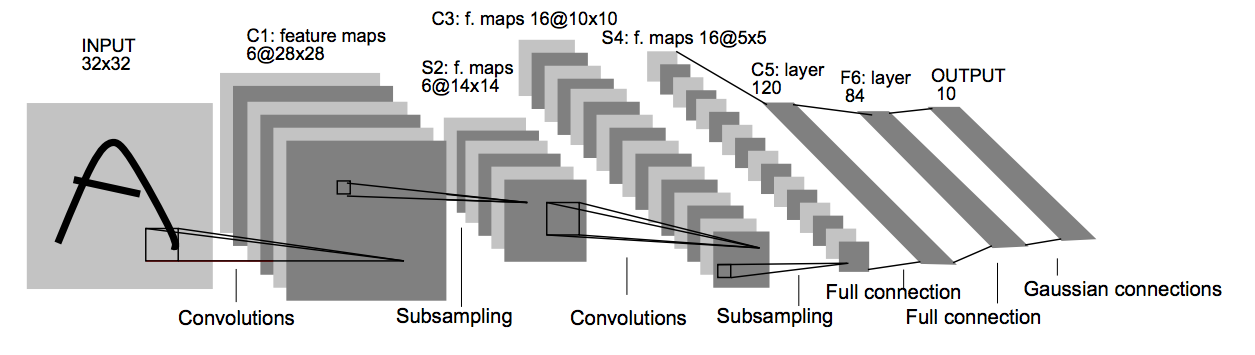

## Sovling XOR problem with a single perceptron

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

- XOR definition

In [2]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [3]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid).to(device) #Perceptron model

In [4]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [5]:
for step in range(20000):
    pred = model(X)
    loss = criterion(pred, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step%2000==0:
        print('step:', step, " loss:", loss.item())

step: 0  loss: 0.7224301695823669
step: 2000  loss: 0.6931471824645996
step: 4000  loss: 0.6931471824645996
step: 6000  loss: 0.6931471824645996
step: 8000  loss: 0.6931471824645996
step: 10000  loss: 0.6931471824645996
step: 12000  loss: 0.6931471824645996
step: 14000  loss: 0.6931471824645996
step: 16000  loss: 0.6931471824645996
step: 18000  loss: 0.6931471824645996


In [6]:
pred = model(X)
print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], device='cuda:0', grad_fn=<SigmoidBackward>)


## Sovling XOR problem with MLP

In [7]:
linear1 = nn.Linear(2, 2, bias=True)
linear2 = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device) # MLP model

In [8]:
# define cost/loss & optimizer
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [9]:
for step in range(20000):
    pred = model(X)
    loss = criterion(pred, Y)
        # cost/loss function
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 1000 == 0:
        print('step:', step, 'loss:', loss.item())

step: 0 loss: 0.704693615436554
step: 1000 loss: 0.6930477619171143
step: 2000 loss: 0.6924399733543396
step: 3000 loss: 0.69007408618927
step: 4000 loss: 0.668951153755188
step: 5000 loss: 0.5696048736572266
step: 6000 loss: 0.31972426176071167
step: 7000 loss: 0.09964828938245773
step: 8000 loss: 0.05261114612221718
step: 9000 loss: 0.035004451870918274
step: 10000 loss: 0.026025108993053436
step: 11000 loss: 0.020633995532989502
step: 12000 loss: 0.01705663651227951
step: 13000 loss: 0.01451700460165739
step: 14000 loss: 0.012624388560652733
step: 15000 loss: 0.011161291971802711
step: 16000 loss: 0.009997489862143993
step: 17000 loss: 0.009050355292856693
step: 18000 loss: 0.00826491229236126
step: 19000 loss: 0.007603250443935394


In [10]:
pred = model(X)
print(pred)

tensor([[0.0082],
        [0.9936],
        [0.9938],
        [0.0072]], device='cuda:0', grad_fn=<SigmoidBackward>)
